<a href="https://colab.research.google.com/github/nanpolend/machine-learning/blob/master/%E6%89%8B%E5%AF%AB%E9%98%BF%E6%8B%89%E4%BC%AF%E6%95%B8%E5%AD%97%E7%82%AB%E6%8A%80%E7%89%88%E5%8A%A0%E8%A8%93%E7%B7%B4%E5%9C%96%E8%A1%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
輸入層 (784 個特徵)
                           ↓
                 隱藏層 1 (128 個神經元, ReLU 激活)
                           ↓
                      Dropout 層 (0.2)
                           ↓
                 輸出層 (10 個神經元, Softmax 激活)

Trial 10 Complete [00h 04m 26s]
val_accuracy: 0.9557499885559082

Best val_accuracy So Far: 0.9794166684150696
Total elapsed time: 00h 53m 13s

最佳超參數組合：
- 隱藏層神經元: 416
- Dropout 率: 0.4
- 學習率: 0.001

訓練最終模型...
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8624 - loss: 0.4601 - val_accuracy: 0.9603 - val_loss: 0.1342
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9551 - loss: 0.1454 - val_accuracy: 0.9705 - val_loss: 0.0969
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9659 - loss: 0.1075 - val_accuracy: 0.9728 - val_loss: 0.0953
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9730 - loss: 0.0847 - val_accuracy: 0.9744 - val_loss: 0.0848
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9777 - loss: 0.0688 - val_accuracy: 0.9759 - val_loss: 0.0779
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9798 - loss: 0.0621 - val_accuracy: 0.9790 - val_loss: 0.0756
Epoch 

<ipython-input-2-f28844c570cd>:118: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f28844c570cd>:118: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f28844c570cd>:118: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f28844c570cd>:118: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f28844c570cd>:118: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f28844c570cd>:118: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f28844c570cd>:118: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from

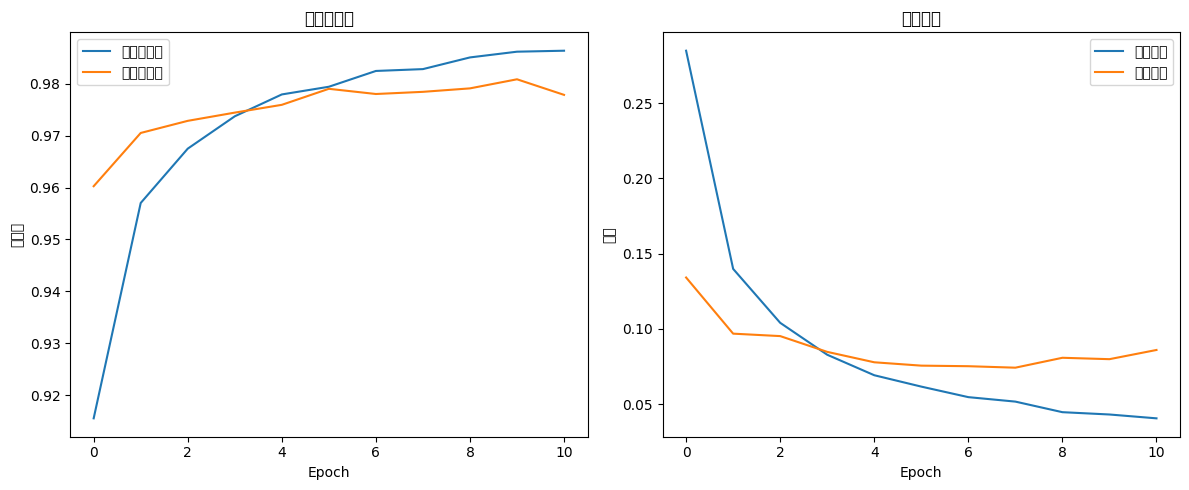

In [2]:
!pip install keras-tuner -q
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import datetime
import matplotlib.pyplot as plt

# 載入並預處理資料
def load_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    return (x_train, y_train), (x_test, y_test)

# TensorBoard 設定
def create_tensorboard_callback():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    return keras.callbacks.TensorBoard(0
        log_dir=log_dir,
        histogram_freq=1,
        profile_batch=0
    )

# 超參數調整模型
def build_hypermodel(hp):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(
            units=hp.Int('units', 32, 512, step=32),
            activation='relu'
        ),
        keras.layers.Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 主流程
def main():
    # 載入資料
    (x_train, y_train), (x_test, y_test) = load_data()

    # 初始化回調
    tensorboard_cb = create_tensorboard_callback()
    early_stop_cb = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # 超參數搜索
    tuner = kt.RandomSearch(
        build_hypermodel,
        objective='val_accuracy',
        max_trials=10,
        executions_per_trial=2,
        directory='hparam_tuning',
        project_name='mnist_kt'
    )

    print("開始超參數搜索...")
    tuner.search(
        x_train, y_train,
        epochs=10,
        validation_split=0.2,
        callbacks=[tensorboard_cb],
        verbose=1
    )

    # 顯示最佳參數
    best_hps = tuner.get_best_hyperparameters()[0]
    print(f"\n最佳超參數組合："
          f"\n- 隱藏層神經元: {best_hps.get('units')}"
          f"\n- Dropout 率: {best_hps.get('dropout')}"
          f"\n- 學習率: {best_hps.get('lr')}")

    # 訓練最終模型
    print("\n訓練最終模型...")
    model = tuner.hypermodel.build(best_hps)
    history = model.fit(
        x_train, y_train,
        epochs=50,
        validation_split=0.2,
        callbacks=[tensorboard_cb, early_stop_cb],
        verbose=1
    )

    # 評估模型
    print("\n模型評估：")
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"測試集準確率: {test_acc:.4f}")

    # 可視化訓練過程
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='訓練準確率')
    plt.plot(history.history['val_accuracy'], label='驗證準確率')
    plt.title('準確率曲線')
    plt.xlabel('Epoch')
    plt.ylabel('準確率')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='訓練損失')
    plt.plot(history.history['val_loss'], label='驗證損失')
    plt.title('損失曲線')
    plt.xlabel('Epoch')
    plt.ylabel('損失')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()